## 13-08-2024 : Practical No. 3.4.4 
### Faraz Syed
### J008 - 40518220007

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Q1)

In [36]:
iris = sns.load_dataset('iris')

#### a)

In [13]:
#checking normality using tests - shapiro wilks
# if p-val > 0.05, accept H0 and conclude that data follows normality. 
from scipy.stats import shapiro
stat,p1 = shapiro(iris['sepal_length'])
print('p-value is',p1)
if p1 > 0.05:
    print('Data follows normality')
else:
    print('Data does not follow normality')


p-value is 0.01018026564270258
Data does not follow normality


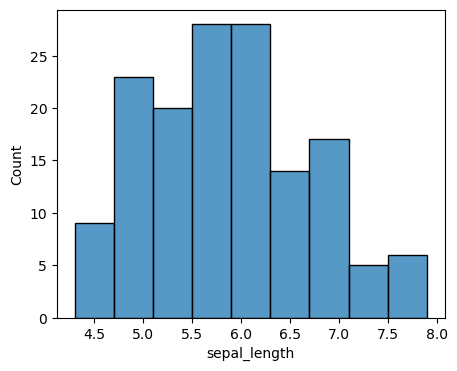

In [94]:
fig =plt.figure(figsize=(5,4))
sns.histplot(iris['sepal_length'])
plt.show()

In [14]:
stat,p2 = shapiro(iris['petal_length'])
print('p-value is',p2)
if p2 > 0.05:
    print('Data follows normality')
else:
    print('Data does not follow normality')

p-value is 7.412652158755861e-10
Data does not follow normality


In [15]:
stat,p3 = shapiro(iris['sepal_width'])
print('p-value is',p3)
if p3 > 0.05:
    print('Data follows normality')
else:
    print('Data does not follow normality')

p-value is 0.10112646222114563
Data follows normality


In [16]:
stat,p4 = shapiro(iris['petal_width'])
print('p-value is',p4)
if p4 > 0.05:
    print('Data follows normality')
else:
    print('Data does not follow normality')

p-value is 1.680264105630158e-08
Data does not follow normality


#### b)

In [26]:
# H0: means are equal v/s H1: means are unequal 

from scipy.stats import ttest_ind
setosa = iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']

print('Checking for setosa and virginica:')
t_stat,p_value=ttest_ind(setosa,virginica)
print('t statistic = ',t_stat,',', 'p-value = ',p_value)

alpha=0.05
if p_value < alpha:
    print('Reject null hypothesis and conclude that means are unequal')
else:
    print('Do not reject null hypothesis and conclude that means are equal')

Checking for setosa and virginica:
t statistic =  -15.386195820079404 , p-value =  6.892546060674059e-28
Reject null hypothesis and conclude that means are unequal


In [27]:
print('Checking for virginica and versicolor:')
t_stat,p_value=ttest_ind(virginica,versicolor)
print('t statistic = ',t_stat,',', 'p-value = ',p_value)

alpha=0.05
if p_value < alpha:
    print('Reject null hypothesis and conclude that means are unequal')
else:
    print('Do not reject null hypothesis and conclude that means are equal')

Checking for virginica and versicolor:
t statistic =  5.629165259719801 , p-value =  1.7248563024547942e-07
Reject null hypothesis and conclude that means are unequal


In [34]:
print('Checking for setosa and versicolor:')
t_stat,p_value=ttest_ind(setosa,versicolor)
print('t statistic = ',t_stat,',', 'p-value = ',p_value)

alpha=0.05
if p_value < alpha:
    print('Reject null hypothesis and conclude that means are unequal.')
else:
    print('Do not reject null hypothesis and conclude that means are equal.')

Checking for setosa and versicolor:
t statistic =  -10.52098626754911 , p-value =  8.985235037487079e-18
Reject null hypothesis and conclude that means are unequal.


In [56]:
# using bartlett test to check for homogeniety 
# H0: Variances are equal  v/s  H1: Variances are unequal
from scipy.stats import bartlett
stat, p = bartlett(setosa,virginica,versicolor)
print('Statistic = ',stat,',', 'p-value = ',p)
alpha=0.05
if p_value < alpha:
    print('Reject null hypothesis and conclude that variances are unequal.')
else:
    print('Do not reject null hypothesis and conclude that variances are equal.')

Statistic =  16.005701874401502 , p-value =  0.0003345076070163035
Reject null hypothesis and conclude that variances are unequal.


#### c)

In [35]:
# checking equality of means of sepal length for setosa and versicolor and virginica.
# H0: mean sepal length is same  v/s  H1: mean sepal length is different. 
from scipy.stats import f_oneway
stat,p=f_oneway(setosa,virginica,versicolor)
print('Statistic = %.3f, p-value = %.3f' % (stat,p))
if p > 0.05:
    print('Mean sepal length for different species is same.')
else:
    print('Mean sepal length for different species is different.')

Statistic = 119.265, p-value = 0.000
Mean sepal length for different species is different.


In [43]:
#OR

import statsmodels.api as sm
import statsmodels.formula.api as smf

anova = smf.ols('sepal_length ~ species', data=iris).fit()
anova_table = sm.stats.anova_lm(anova,typ = 2)

# Define the hypothesis

print("One-Way ANOVA Hypothesis Testing:")
print("H0: the means of sepal_length are equal across all species.")
print("H1: At least one species has a mean sepal_length that is different from the others.")
print(' ')
#Print the ANOVA table 
print(anova_table)

#Interpretation of p-value
p_value = anova_table['PR(>F)'][0] 
if p_value > 0.05:
    print("\nFail to reject H0. There is no significant difference in sepal_length across species.")
else: 
    print("\nReject H0. There is a significant difference in sepal_length across species.")

One-Way ANOVA Hypothesis Testing:
H0: the means of sepal_length are equal across all species.
H1: At least one species has a mean sepal_length that is different from the others.
 
             sum_sq     df           F        PR(>F)
species   63.212133    2.0  119.264502  1.669669e-31
Residual  38.956200  147.0         NaN           NaN

Reject H0. There is a significant difference in sepal_length across species.


#### d)

In [53]:
#Using kruskal wallis 
# H0: Median is equal for all species  v/s  H1: Median is unequal for all species.
from scipy import stats
stat, p = stats.kruskal(setosa,virginica,versicolor)
print('Statistic = %.3f, p-value = %.3f' % (stat,p))
if p > 0.05:
    print("Fail to reject H0. Median is equal for all species. ")
else: 
    print("Reject H0. Median is unequal for all species.")

Statistic = 96.937, p-value = 0.000
Reject H0. Median is unequal for all species.


### Q2)

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [67]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [3]:
penguins.dropna(inplace=True)

In [4]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [71]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# don't solve (a)

In [5]:
male = penguins[penguins['sex'] == 'Male']['body_mass_g']
female = penguins[penguins['sex'] == 'Female']['body_mass_g']

#### b)

In [72]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [74]:
adelie = penguins[penguins['species'] == 'Adelie']['flipper_length_mm']
chinstrap = penguins[penguins['species'] == 'Chinstrap']['flipper_length_mm']
gentoo = penguins[penguins['species'] == 'Gentoo']['flipper_length_mm']
stat,p=f_oneway(adelie,chinstrap,gentoo)
print('Statistic = %.3f, p-value = %.3f' % (stat,p))
if p > 0.05:
    print('Mean flipper length for different species is same.')
else:
    print('Mean flipper length for different species is different.')

Statistic = 567.407, p-value = 0.000
Mean flipper length for different species is different.


In [87]:
# OR 

model=ols('flipper_length_mm ~ species',data=penguins).fit()
sm.stats.anova_lm(model,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,50525.883615,25262.941807,567.406992,1.587418e-107
Residual,330.0,14692.753022,44.523494,NaN,NaN


#### c)

In [75]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [88]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model=ols('flipper_length_mm ~ island + species + C(island):C(species)',data=penguins).fit()
sm.stats.anova_lm(model,typ=2)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
island,234.420198,2.0,2.647746,7.232397e-02
species,26720.641426,2.0,301.806206,4.453759e-75
C(island):C(species),101397.544419,8.0,286.318054,1.299456e-105
Residual,14519.864427,328.0,NaN,NaN


#### d) check the normality of flipper length

In [89]:
from scipy.stats import shapiro
stat,p1 = shapiro(penguins['flipper_length_mm'])
print('p-value is',p1)
if p1 > 0.05:
    print('flipper_length_mm follows normality')
else:
    print('flipper_length_mm does not follow normality')

p-value is 5.392858604125195e-09
flipper_length_mm does not follow normality


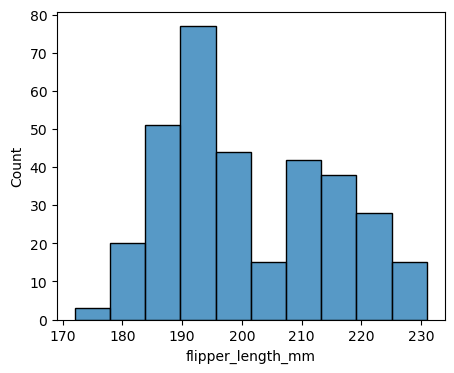

In [93]:
fig =plt.figure(figsize=(5,4))
sns.histplot(penguins['flipper_length_mm'])
plt.show()

#### e)

In [96]:
from statsmodels.stats.weightstats import ztest as ztest

male = penguins[penguins['sex'] == 'Male']['bill_length_mm']
female = penguins[penguins['sex'] == 'Female']['bill_length_mm']
stats,pval=ztest(male,female,value=0)
print('Z statistic = ',stat,',', 'p-value = ',pval)

alpha=0.05
if pval < alpha:
    print('Reject null hypothesis and conclude that means of bill lengths of male and female penguins are not same. ')
else:
    print('Do not reject null hypothesis and conclude that means of bill lengths of male and female penguins are same.')

Z statistic =  0.9517050385475159 , p-value =  2.610359598716445e-11
Reject null hypothesis and conclude that means of bill lengths of male and female penguins are not same. 


#### f)

In [100]:
# using wilcoxon as only two categories. more than 2, kruskal wallis. 
# can't use wilcoxon here as male and female do not have equal size. so we use mann-whitney

from scipy.stats import mannwhitneyu

stat,pval=mannwhitneyu(male,female)
print('U statistic = ',stat,',', 'p-value = ',pval)

alpha=0.05
if pval < alpha:
    print('Reject null hypothesis and conclude that means of bill lengths of male and female penguins are not same.')
else:
    print('Do not reject null hypothesis and conclude that means of bill lengths of male and female penguins are same.')

U statistic =  19542.0 , p-value =  9.901184093608371e-11
Reject null hypothesis and conclude that means of bill lengths of male and female penguins are not same.


### Q3)

In [102]:
# H0: observed value does not differ from expected value   v/s H1: observed value differs from expected value
observed = [8,6,10,7,8,11,9]
expected = [9,8,11,8,10,7,6]

import scipy.stats as stats 
stat,pval=stats.chisquare(f_obs=observed,f_exp=expected)
print('Statistic = ',stat,',', 'p-value = ',pval)
alpha=0.05
if pval < alpha:
    print('Reject null hypothesis and conclude that observed value differs from expected value.')
else:
    print('Do not reject null hypothesis and conclude that observed value does not differ from expected value.')

Statistic =  5.0127344877344875 , p-value =  0.542180861413329
Do not reject null hypothesis and conclude that observed value does not differ from expected value.


### Q4)

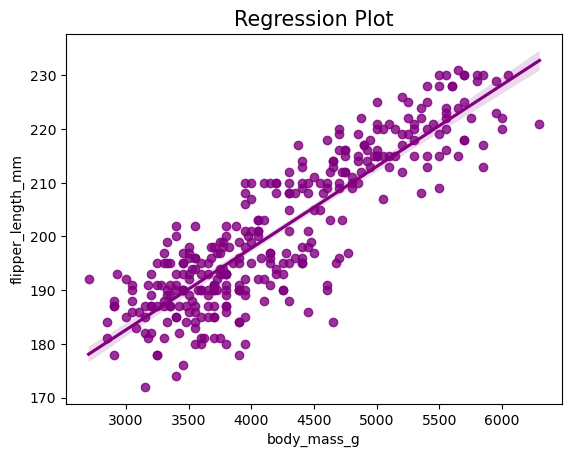

In [7]:
sns.regplot(x='body_mass_g',y='flipper_length_mm',color='purple',data=penguins)
plt.title('Regression Plot',size=15)
plt.show()

In [6]:
import statsmodels.api as sm
model=sm.OLS.from_formula('body_mass_g ~ flipper_length_mm',data=penguins).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          3.13e-105
Time:                        11:17:28   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.28

### Q5)

In [13]:
from scipy.stats import uniform
data_uniform = uniform.rvs(size=10, loc = 1, scale=20)
print(data_uniform)

[17.68362097  8.35814654  8.53837932 14.41533269 18.62180341 11.27924496
 17.80796397 11.46848794  9.43237408 14.39820257]


In [18]:
from scipy.stats import norm
data_normal = norm.rvs(size=10,loc=1,scale=20)
print(data_normal)

[ -7.77299185   0.57291384  40.96020695 -53.49278198 -11.8074313
 -43.92083772   7.79800504 -18.20412655  -8.37061492  24.94003731]


In [19]:
from scipy.stats import expon
data_exponential = expon.rvs(scale=20,loc=1,size=10)
print(data_exponential)

[33.76546515 20.13837654  1.2130529  30.74083667  7.99361429 19.05691335
  9.34459995 33.50075703  4.83740223 41.81051328]


In [23]:
from scipy.stats import binom
data_binomial = binom.rvs(n=10,p=0.75,size=10)
print(data_binomial)

[ 5  6  6  4  7  7  8  7  9 10]
